<a href="https://colab.research.google.com/github/Aleena24/AML_lab/blob/main/2348503_prg7_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [7]:
df = pd.read_csv('/content/prg-7.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [10]:
#conversion of categorical data to numerical data
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

In [11]:
#selecting features for clustering
features = df[['Age','Gender','Height','Weight']]

In [21]:
#number of clusters
kvalues = [1,2,3,4,5,6]

In [22]:
#iteration through the k-values
for k in kvalues:
  kmeans = KMeans(n_clusters = k, random_state = 42)
  df['cluster'] = kmeans.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [23]:
#reduce dimensionality of features
pca = PCA(n_components = 2)
reduced_features = pca.fit_transform(features)

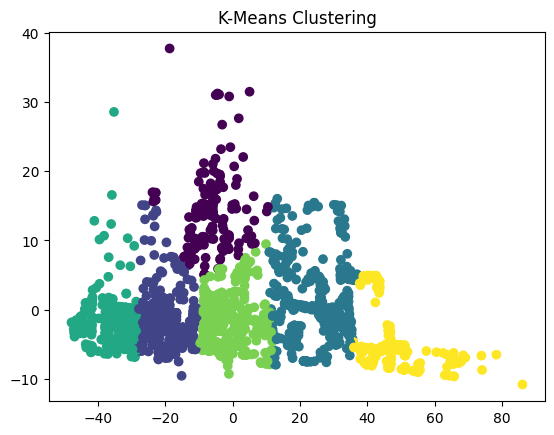

In [24]:
#visualization of clusters
plt.scatter(reduced_features[:,0],reduced_features[:,1],c=df['cluster'],cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

In [25]:
#cluster centers using inverse transform of PCA
print(f'Cluster Centers for K={k}:\n', kmeans.cluster_centers_)


Cluster Centers for K=6:
 [[ 37.90507305   0.30769231   1.65780471  79.54233799]
 [ 21.60154236   0.53439153   1.67066287  67.20910104]
 [ 26.5763972    0.68259386   1.73291832 110.47676516]
 [ 20.13694317   0.25277778   1.64664612  50.09599924]
 [ 22.24277938   0.66132723   1.72154741  85.53229668]
 [ 22.12279291   0.17857143   1.77625543 135.41586449]]


In [17]:
#conceptual interpretation
print('Conceptual Interpretation')
for cluster_label in range(k):
  cluster_data = df[df['cluster']==cluster_label]
  print('Cluster : ',cluster_label)
  print(cluster_data[['Gender', 'Age', 'Height', 'Weight', 'NObeyesdad']])
  print('\n')

Interpretation
Cluster :  0
      Gender        Age    Height     Weight  NObeyesdad
17         0  29.000000  1.530000  78.000000           2
18         0  30.000000  1.710000  82.000000           6
21         0  52.000000  1.690000  87.000000           2
33         1  39.000000  1.790000  90.000000           6
89         0  29.000000  1.700000  78.000000           6
...      ...        ...       ...        ...         ...
1484       0  37.471683  1.549812  76.082517           2
1487       0  39.126310  1.562889  76.659490           2
1488       0  37.063599  1.502609  75.279605           2
1489       0  41.318302  1.544937  77.053948           2
1490       0  43.726081  1.592316  77.001030           2

[181 rows x 5 columns]


Cluster :  1
      Gender        Age    Height     Weight  NObeyesdad
0          0  21.000000  1.620000  64.000000           1
8          1  24.000000  1.780000  64.000000           1
9          1  22.000000  1.720000  68.000000           1
14         1  23.0000